In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt

import time
import psutil

# Read Dataset

In [3]:
train_file_path = '/content/drive/MyDrive/ITU_Competition_Intrusion_and_Vulnerability_Detection_in_Software_Defined_Networks(SDN)/train_data_10_features.csv'
test_file_path = '/content/drive/MyDrive/ITU_Competition_Intrusion_and_Vulnerability_Detection_in_Software_Defined_Networks(SDN)/test_data_10_features.csv'

train_df = pd.read_csv(train_file_path,skipinitialspace=True)
test_df = pd.read_csv(test_file_path,skipinitialspace=True)

In [4]:
#Split data into X(input features) and Y (labels)
X_train = train_df.drop(train_df.columns[-1], axis=1)
y_train = train_df[train_df.columns[-1]]

X_test = test_df.drop(test_df.columns[-1], axis=1)
y_test = test_df[test_df.columns[-1]]

features = X_train.columns.tolist()
class_labels = ['Benign','Bot','DDoS','DoS_Golden_Eye','DoS_Hulk','DoS_Slowhttptest','DoS_Slowloris','FTP_Patator',
        'Hearbleed','Infiltration','PortScan','SSH_Patator','WebAttack_Brute_Force','WebAttack_Sql_Injection','WebAttack_XSS']




In [5]:
print(features)

['Packet Length Std', 'Average Packet Size', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Avg Bwd Segment Size', 'Fwd Packet Length Max', 'Destination Port', 'Total Length of Fwd Packets', 'Init_Win_bytes_forward', 'Subflow Fwd Bytes']


In [6]:
print(class_labels)

['Benign', 'Bot', 'DDoS', 'DoS_Golden_Eye', 'DoS_Hulk', 'DoS_Slowhttptest', 'DoS_Slowloris', 'FTP_Patator', 'Hearbleed', 'Infiltration', 'PortScan', 'SSH_Patator', 'WebAttack_Brute_Force', 'WebAttack_Sql_Injection', 'WebAttack_XSS']


In [18]:
print("Records deleted in training dataset:",train_df.isnull().sum().sum())
print("Records deleted in test dataset:", test_df.isnull().sum().sum())

Records deleted in training dataset: 0
Records deleted in test dataset: 0


# Performance evaluation method

In [30]:
def perf_evaluation(y_true,y_pred,class_labels):

    # # Compute the confusion matrix
    matrix = confusion_matrix(y_true,y_pred,normalize='true')
    conf_matrix = confusion_matrix(y_true,y_pred)
    print("Confusion Matrix:")

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(15, 15))
    sns.heatmap(matrix, annot=True,fmt='.4f',cmap="viridis", square=True,
                xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Accuracy and Classification Report
    accuracy = accuracy_score(y_true, y_pred) * 100
    print("Total Accuracy: ",accuracy)
    report = classification_report(y_true,y_pred)
    print("Classification Report")
    print(report)


    # Calculate TP, TN, FP, FN for each class
    class_tp = {}
    class_tn = {}
    class_fp = {}
    class_fn = {}

    for i, label in enumerate(class_labels):
        tp = conf_matrix[i, i]
        tn = conf_matrix.sum() - conf_matrix[i, :].sum() - conf_matrix[:, i].sum() + tp
        fp = conf_matrix[:, i].sum() - tp
        fn = conf_matrix[i, :].sum() - tp

        class_tp[label] = tp
        class_tn[label] = tn
        class_fp[label] = fp
        class_fn[label] = fn

    # Print true positives, true negatives, false positives, and false negatives for each class
    for label in class_labels:
        print(f"Class {label}:")
        print("True Positives (TP):", class_tp[label])
        print("True Negatives (TN):", class_tn[label])
        print("False Positives (FP):", class_fp[label])
        print("False Negatives (FN):", class_fn[label])
        print()

# Decision Tree

In [8]:
from tables.tests.common import verbosePrint
# Use 5-fold cross validation
from sklearn import tree
DT_clf = tree.DecisionTreeClassifier()
#kf = KFold(n_splits=5, shuffle=True, random_state=42)
#scores = cross_val_score(DT_clf, X_train, y_train, cv=kf, scoring='accuracy')
#print(scores)

In [9]:
# Train final model
start_time = time.time()
Dt_clf = DT_clf.fit(X_train, y_train)
end_time = time.time()
dt_training_time = end_time - start_time
print("Decision Tree Training Time:", dt_training_time, "seconds")
y_pred = DT_clf.predict(X_test) # change to x_test_0

Decision Tree Training Time: 39.21176886558533 seconds


Confusion Matrix:


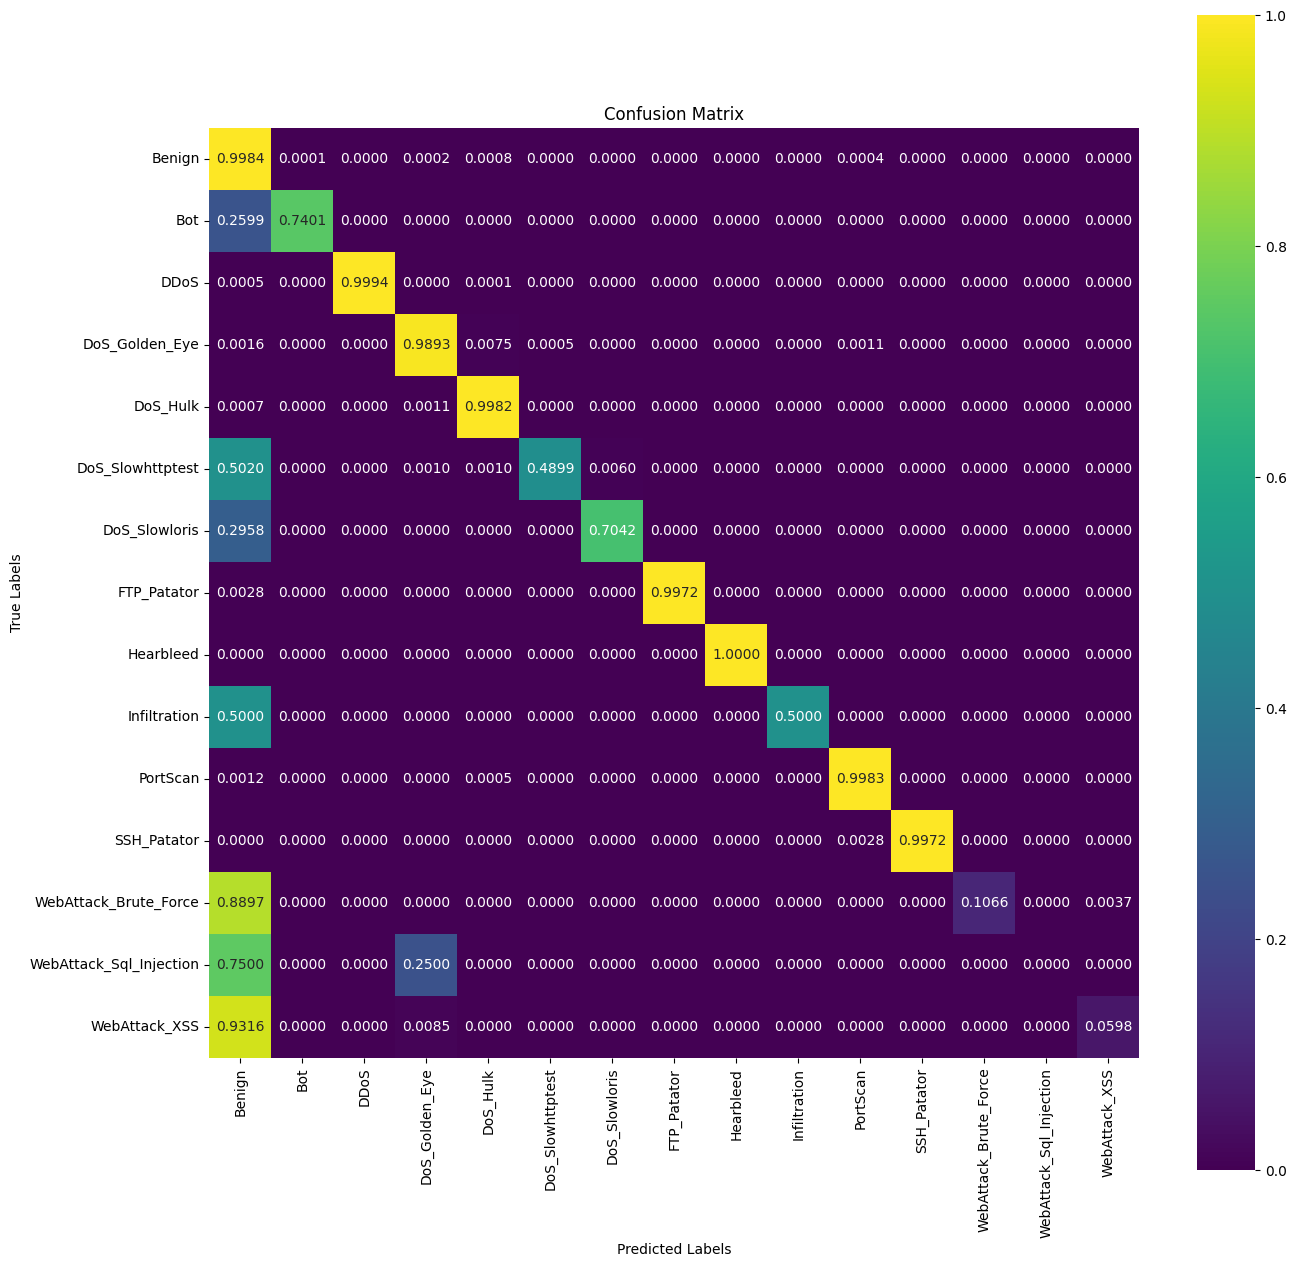

Total Accuracy:  99.5922117527466
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    410865
           1       0.93      0.74      0.82       354
           2       1.00      1.00      1.00     23160
           3       0.93      0.99      0.96      1861
           4       0.99      1.00      0.99     41626
           5       0.99      0.49      0.66       994
           6       0.99      0.70      0.82      1048
           7       1.00      1.00      1.00      1436
           8       1.00      1.00      1.00         2
           9       0.60      0.50      0.55         6
          10       0.99      1.00      1.00     28728
          11       1.00      1.00      1.00      1067
          12       0.94      0.11      0.19       272
          13       0.00      0.00      0.00         4
          14       0.70      0.06      0.11       117

    accuracy                           1.00    511540
   macro avg       0.87 

In [31]:
perf_evaluation(y_test,y_pred,class_labels)

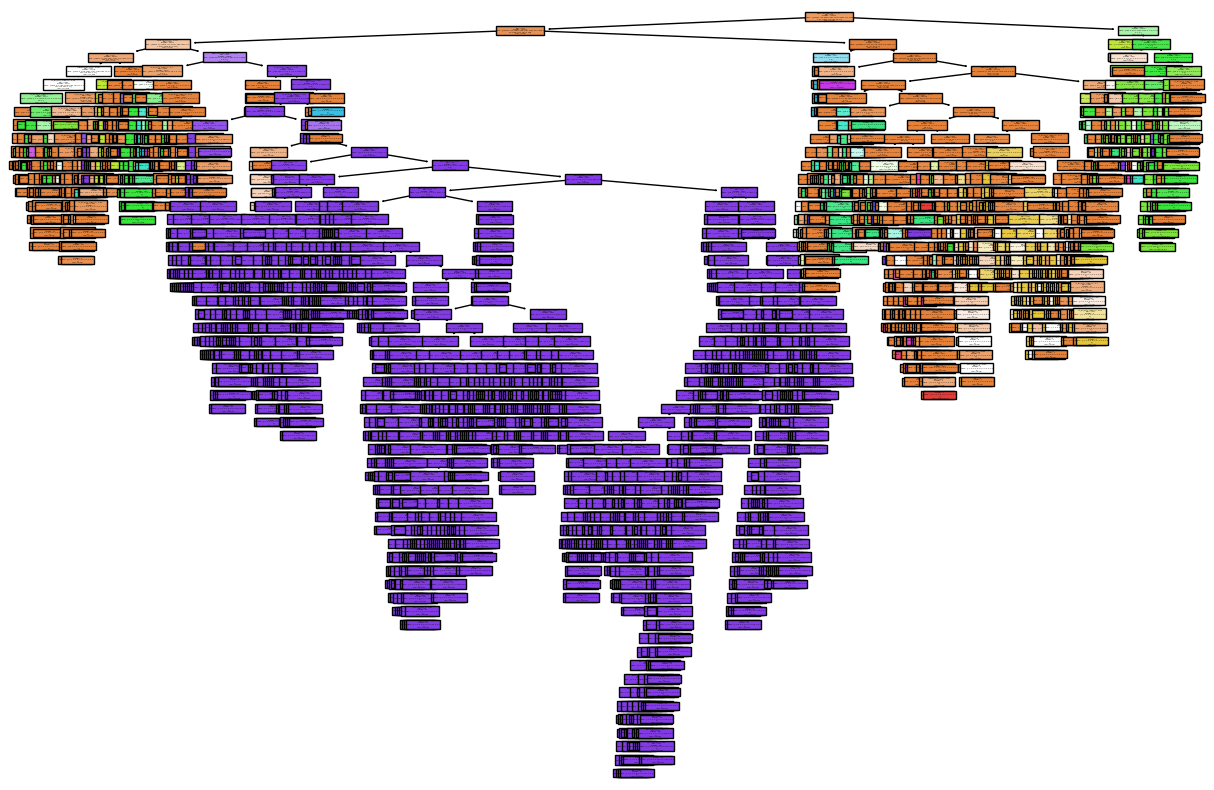

In [38]:
# Plot the decision tree as a figure
plt.figure(figsize=(15, 10))  #
plot_tree(DT_clf, feature_names=features, class_names=class_labels, filled=True)
plt.show()

# K-Nearest Neighbours

In [39]:
# Use 5-fold cross validation
from sklearn.neighbors import KNeighborsClassifier

In [40]:
# Train final model
KNN_clf = KNeighborsClassifier(n_neighbors=3,n_jobs=-1,algorithm='kd_tree')
KNN_clf = KNN_clf.fit(X_train,y_train)
y_pred = KNN_clf.predict(X_test)

Confusion Matrix:


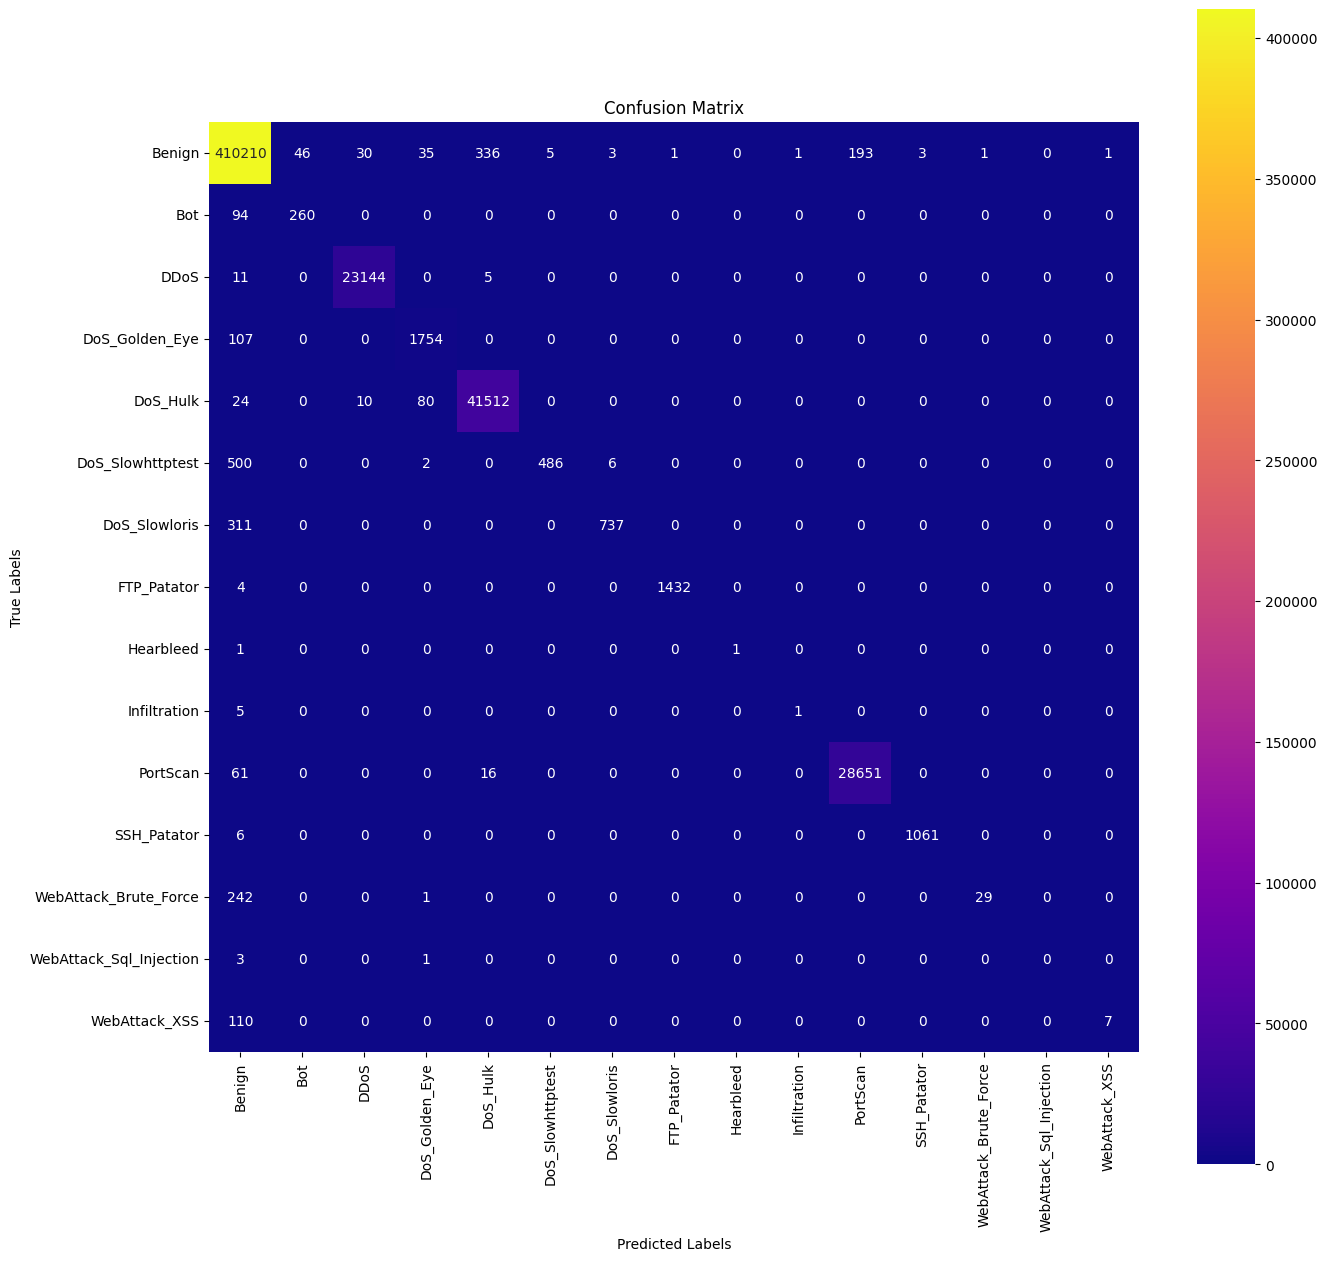

Total Accuracy:  99.55917425812252


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    410865
           1       0.85      0.73      0.79       354
           2       1.00      1.00      1.00     23160
           3       0.94      0.94      0.94      1861
           4       0.99      1.00      0.99     41626
           5       0.99      0.49      0.65       994
           6       0.99      0.70      0.82      1048
           7       1.00      1.00      1.00      1436
           8       1.00      0.50      0.67         2
           9       0.50      0.17      0.25         6
          10       0.99      1.00      1.00     28728
          11       1.00      0.99      1.00      1067
          12       0.97      0.11      0.19       272
          13       0.00      0.00      0.00         4
          14       0.88      0.06      0.11       117

    accuracy                           1.00    511540
   macro avg       0.87      0.65      0.69    511540
weig

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
perf_evaluation(y_test,y_pred,class_labels)

# Random Forest

In [42]:
# Use 5-fold cross validation
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=20, max_depth=None,min_samples_split=2, random_state=0,verbose=2)

In [43]:
# Train final model
RF_clf = RF_clf.fit(X_train,y_train)
y_pred = RF_clf.predict(X_test)

building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


In [44]:
y_pred = RF_clf.predict(X_test)

Confusion Matrix:


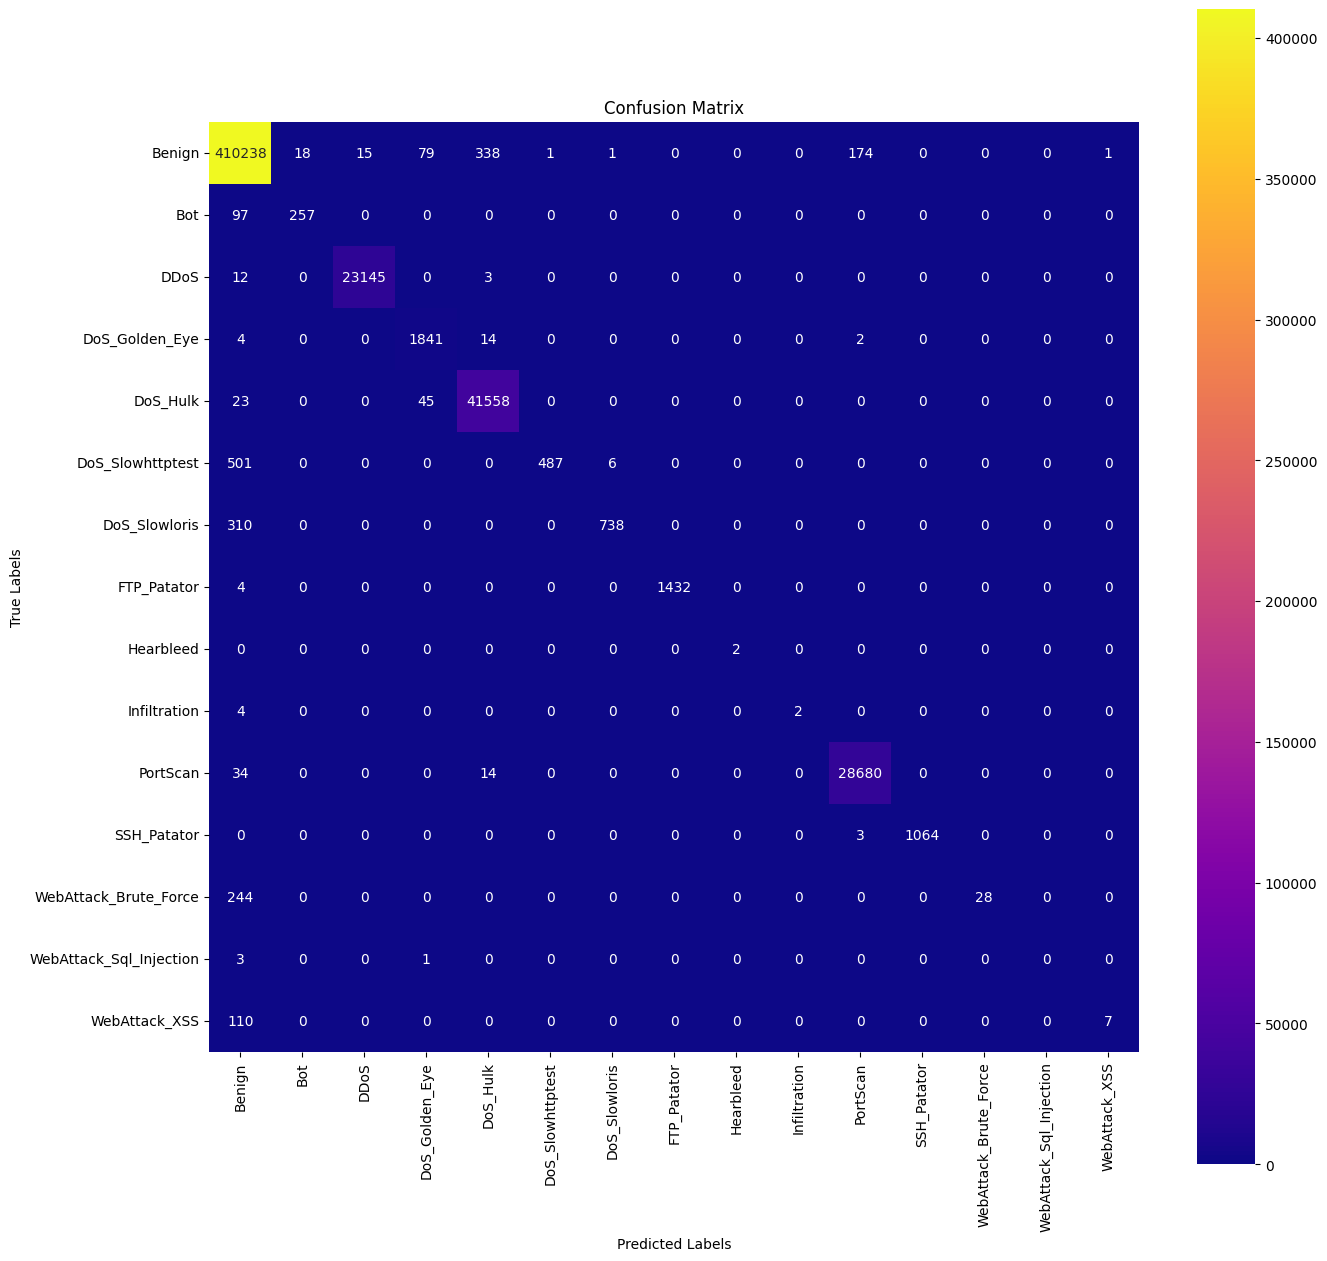

Total Accuracy:  99.59709895609336


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    410865
           1       0.93      0.73      0.82       354
           2       1.00      1.00      1.00     23160
           3       0.94      0.99      0.96      1861
           4       0.99      1.00      0.99     41626
           5       1.00      0.49      0.66       994
           6       0.99      0.70      0.82      1048
           7       1.00      1.00      1.00      1436
           8       1.00      1.00      1.00         2
           9       1.00      0.33      0.50         6
          10       0.99      1.00      1.00     28728
          11       1.00      1.00      1.00      1067
          12       1.00      0.10      0.19       272
          13       0.00      0.00      0.00         4
          14       0.88      0.06      0.11       117

    accuracy                           1.00    511540
   macro avg       0.91      0.69      0.74    511540
weig

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
perf_evaluation(y_test,y_pred,class_labels)

# Support Vector Machine

In [46]:
# Use 5-fold cross validation
from sklearn import svm
SVM_clf = svm.SVC()


In [ ]:
# Train final model
SVM_clf = SVM_clf.fit(X_train,y_train)
y_pred = SVM_clf.predict(X_test)

In [ ]:
perf_evaluation(y_test,y_pred,class_labels)

# Feed Forward Neural Network

In [32]:
# Ues 5-fold cross validation
from sklearn.neural_network import MLPClassifier
MLP_clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(20,18), random_state=1,verbose=2)

In [33]:
# Train final model
MLP_clf = MLP_clf.fit(X_train,y_train)
y_pred = MLP_clf.predict(X_test)

Iteration 1, loss = 0.29609309
Iteration 2, loss = 0.20402224
Iteration 3, loss = 0.18033456
Iteration 4, loss = 0.16741958
Iteration 5, loss = 0.15650367
Iteration 6, loss = 0.14803819
Iteration 7, loss = 0.14044356
Iteration 8, loss = 0.13436728
Iteration 9, loss = 0.12864031
Iteration 10, loss = 0.12355440
Iteration 11, loss = 0.11900539
Iteration 12, loss = 0.11493696
Iteration 13, loss = 0.11079210
Iteration 14, loss = 0.10630793
Iteration 15, loss = 0.10299129
Iteration 16, loss = 0.10043140
Iteration 17, loss = 0.09820163
Iteration 18, loss = 0.09610503
Iteration 19, loss = 0.09451872
Iteration 20, loss = 0.09321689
Iteration 21, loss = 0.09192690
Iteration 22, loss = 0.09114957
Iteration 23, loss = 0.09030715
Iteration 24, loss = 0.08937506
Iteration 25, loss = 0.08859816
Iteration 26, loss = 0.08790092
Iteration 27, loss = 0.08739516
Iteration 28, loss = 0.08704556
Iteration 29, loss = 0.08626779
Iteration 30, loss = 0.08602753
Iteration 31, loss = 0.08555319
Iteration 32, los

Confusion Matrix:


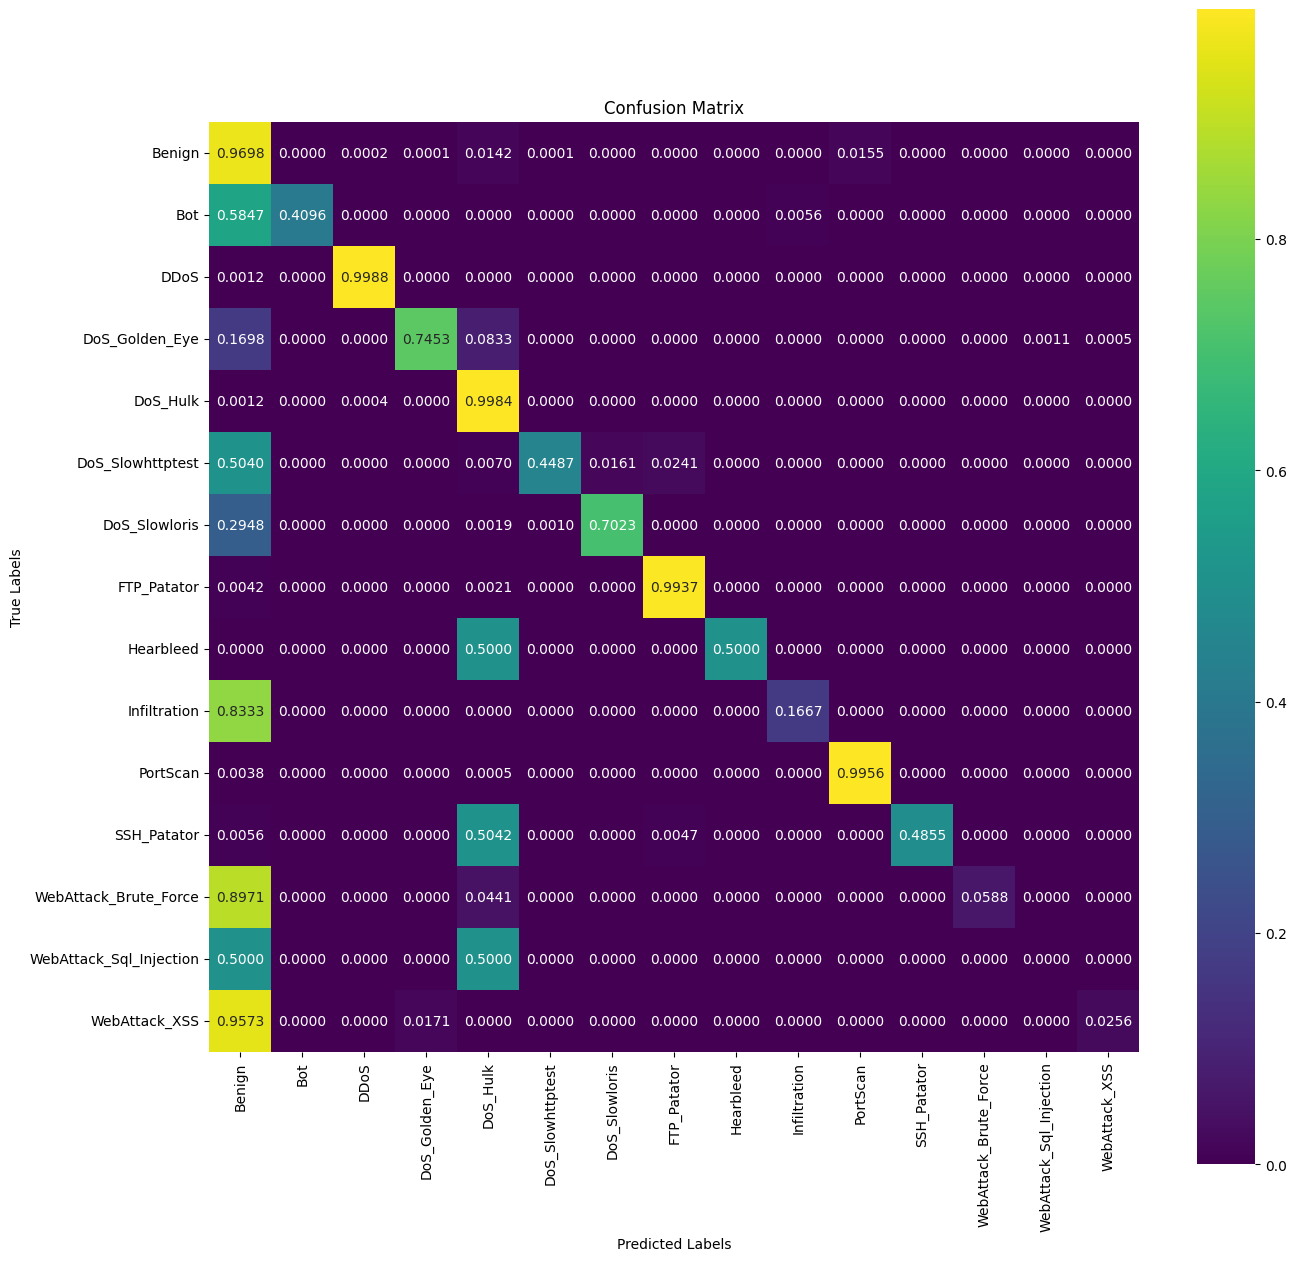

Total Accuracy:  97.05027954803144
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    410865
           1       0.92      0.41      0.57       354
           2       1.00      1.00      1.00     23160
           3       0.96      0.75      0.84      1861
           4       0.86      1.00      0.93     41626
           5       0.94      0.45      0.61       994
           6       0.97      0.70      0.82      1048
           7       0.98      0.99      0.99      1436
           8       1.00      0.50      0.67         2
           9       0.25      0.17      0.20         6
          10       0.82      1.00      0.90     28728
          11       1.00      0.49      0.65      1067
          12       0.89      0.06      0.11       272
          13       0.00      0.00      0.00         4
          14       0.50      0.03      0.05       117

    accuracy                           0.97    511540
   macro avg       0.81

In [34]:
perf_evaluation(y_test,y_pred,class_labels)